### Load the Datasets and observe the structure

# Task 1

In [10]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
customers_file = r"C:\Users\PRAGNA\Downloads\Customers.csv"
products_file = r"C:\Users\PRAGNA\Downloads\Products.csv"
transactions_file = r"C:\Users\PRAGNA\Downloads\Transactions.csv"

# Loading the datasets
customers = pd.read_csv(customers_file)
products = pd.read_csv(products_file)
transactions = pd.read_csv(transactions_file)

In [4]:
# Displaying the first few rows of each dataset
print("Customers Dataset:")
display(customers.head())

print("\nProducts Dataset:")
display(products.head())

print("\nTransactions Dataset:")
display(transactions.head())

Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
# Checking the structure and basic statistics of each dataset
print("\nCustomers Info:")
print(customers.info())

print("\nProducts Info:")
print(products.info())

print("\nTransactions Info:")
print(transactions.info())



Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Nul

In [13]:
from tabulate import tabulate

# Customers Info
customers_summary = customers.describe(include='all').transpose()
print("Customers Info:\n")
print(tabulate(customers_summary, headers='keys', tablefmt='pretty'))

# Products Info
products_summary = products.describe().transpose()
print("\nProducts Info:\n")
print(tabulate(products_summary, headers='keys', tablefmt='pretty'))

# Transactions Info
transactions_summary = transactions.describe().transpose()
print("\nTransactions Info:\n")
print(tabulate(transactions_summary, headers='keys', tablefmt='pretty'))


Customers Info:

+--------------+-------+--------+------------------+------+
|              | count | unique |       top        | freq |
+--------------+-------+--------+------------------+------+
|  CustomerID  |  200  |  200   |      C0001       |  1   |
| CustomerName |  200  |  200   | Lawrence Carroll |  1   |
|    Region    |  200  |   4    |  South America   |  59  |
|  SignupDate  |  200  |  179   |    2022-04-16    |  3   |
+--------------+-------+--------+------------------+------+

Products Info:

+-------+-------+--------------------+--------------------+-------+--------------------+---------+--------+--------+
|       | count |        mean        |        std         |  min  |        25%         |   50%   |  75%   |  max   |
+-------+-------+--------------------+--------------------+-------+--------------------+---------+--------+--------+
| Price | 100.0 | 267.55170000000004 | 143.21938309125758 | 16.08 | 147.76749999999998 | 292.875 | 397.09 | 497.76 |
+-------+-------+-

In [7]:
# Checking for missing values in each dataset
print("\nMissing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


There are no missing values in the datasets.

In [8]:
# Verifying relationships between datasets
print("\nUnique CustomerIDs in Customers vs. Transactions:")
print(len(set(customers['CustomerID']) & set(transactions['CustomerID'])))

print("\nUnique ProductIDs in Products vs. Transactions:")
print(len(set(products['ProductID']) & set(transactions['ProductID'])))


Unique CustomerIDs in Customers vs. Transactions:
199

Unique ProductIDs in Products vs. Transactions:
100


All the Customers and Products are unique. They are only repeated in the Transactions dataset.

### Exploratory Data Analysis

C:\Users\PRAGNA\AppData\Local\Temp\ipykernel_10908\2302736132.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


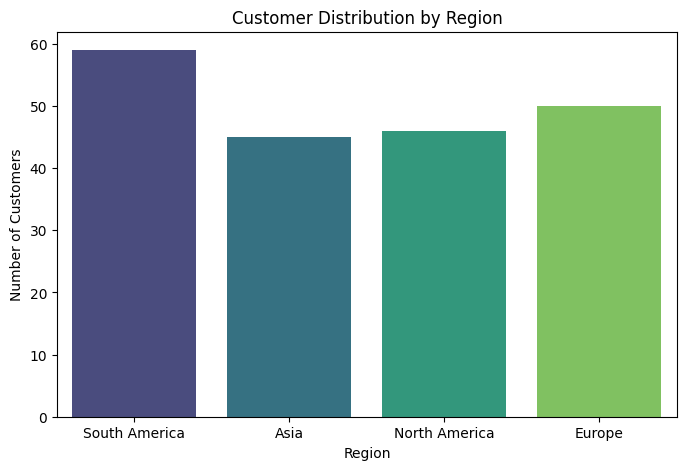

In [14]:
# Visualizations
# 1. Customer regions distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

We visualized the Customer Distribution by Region. From this we can say that, South America has more customer distribution followed by Europe, then North America and Asia.

C:\Users\PRAGNA\AppData\Local\Temp\ipykernel_10908\1713618527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, y='Category', palette='plasma')


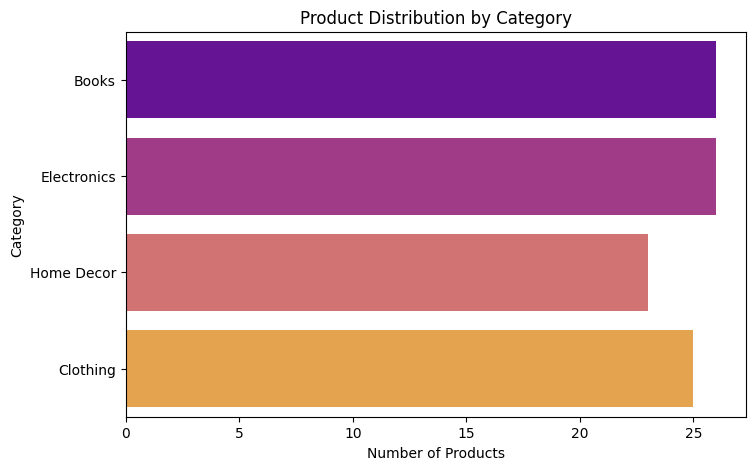

In [15]:
# 2. Product categories distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=products, y='Category', palette='plasma')
plt.title("Product Distribution by Category")
plt.ylabel("Category")
plt.xlabel("Number of Products")
plt.show()

Here, we visualized the Product Distribution by Category. There are more products in Books & Electronics, followed by Clothing and Home Decor.

C:\Users\PRAGNA\AppData\Local\Temp\ipykernel_10908\415316846.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Quantity', y='ProductName', palette='coolwarm')


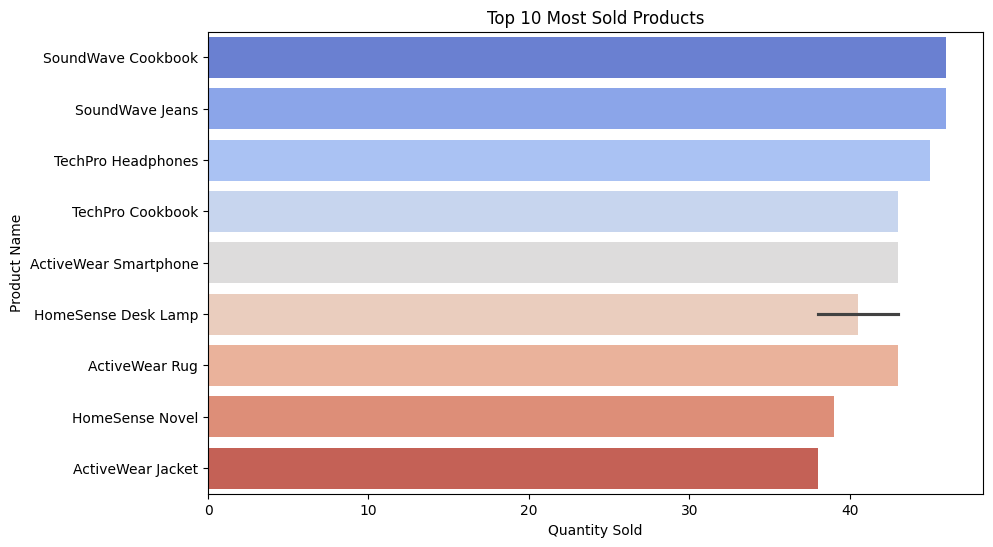

In [19]:
# 3. Top 10 most sold products
# # Grouping by ProductID and summing up the quantities sold
top_products = transactions.groupby('ProductID', as_index=False)['Quantity'].sum()

# Sorting by Quantity in descending order and selecting the top 10
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)

# Merging with the products dataset to get product details
top_products = top_products.merge(products, on='ProductID', how='left')

# Plotting the Top 10 most sold products
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Quantity', y='ProductName', palette='coolwarm')
plt.title("Top 10 Most Sold Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()


From this, we can say that, the top most sold product is SoundWave Cookbook follwed by SoundWave Jeans and PechPro Headphones. So, we can safely say that, products from SoundWave brand are sold the most. This means that, products under this brand have high chances of generating revenue.

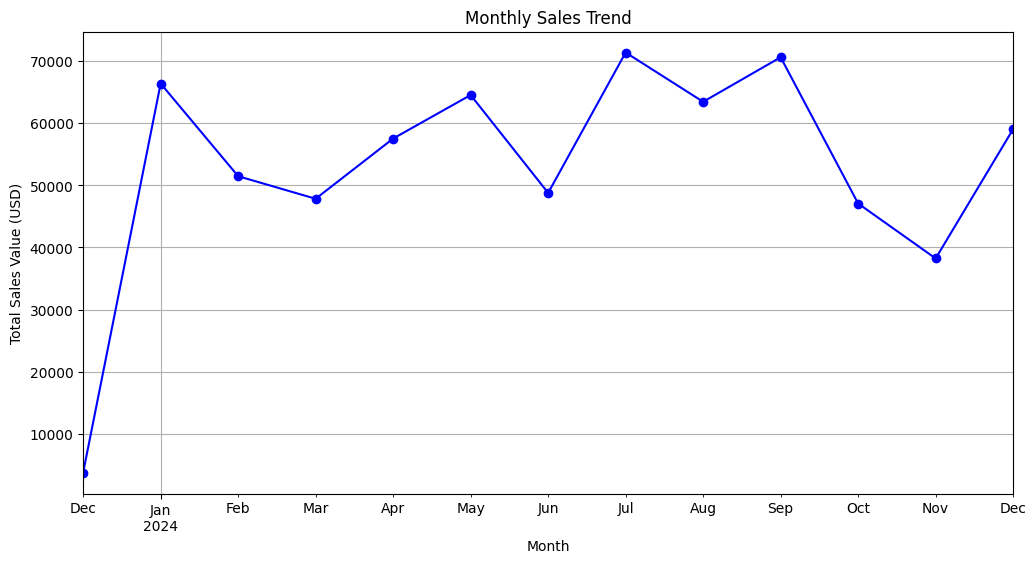

In [20]:
# 4. Monthly sales trend
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Value (USD)")
plt.grid(True)
plt.show()



From this we can derive that, most of the sales and transsactions took place in the month of July followed by September and January.

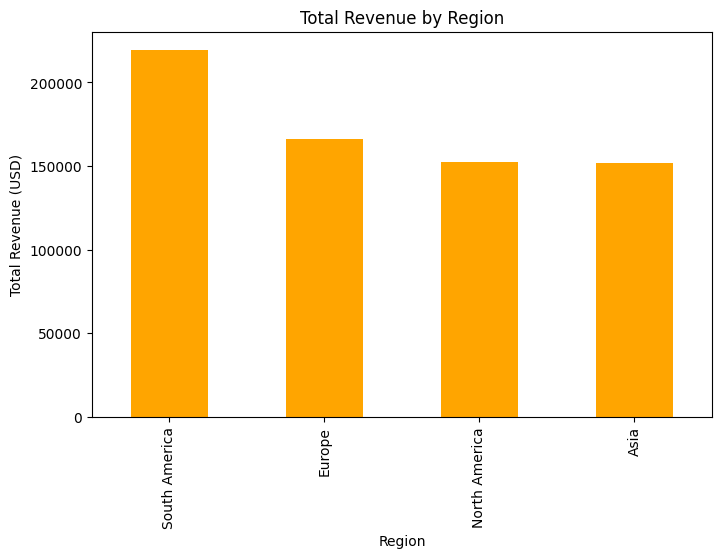

In [21]:
# 5. Revenue by Region
region_revenue = transactions.merge(customers, on='CustomerID')
region_revenue = region_revenue.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
region_revenue.plot(kind='bar', color='orange')
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.show()

From this we can derive that, Most of the Revenue us generated BY South America followed by Europe, North America and Asia. As we have observed previously, this distribution is similar to the population distribution in regions. So we can assume that, the population of a region is directly proportional to the total revenue generated in the region.

In [23]:
#top 10 revenue generating products
top_revenue_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_revenue_products = top_revenue_products.reset_index().merge(products, on='ProductID', how='left')
print(top_revenue_products[['ProductName', 'TotalValue']])


                ProductName  TotalValue
0        TechPro Headphones    19513.80
1            ActiveWear Rug    17946.91
2          TechPro Cookbook    17905.20
3         ActiveWear Jacket    15060.92
4           HomeSense Novel    14592.24
5           SoundWave Jeans    13947.20
6        TechPro Smartwatch    13778.88
7     ActiveWear Smartwatch    13671.60
8     ComfortLiving Sweater    13487.95
9  ComfortLiving Smartphone    13232.12


C:\Users\PRAGNA\AppData\Local\Temp\ipykernel_10908\3477825068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_revenue_products, x='TotalValue', y='ProductName', palette='coolwarm')


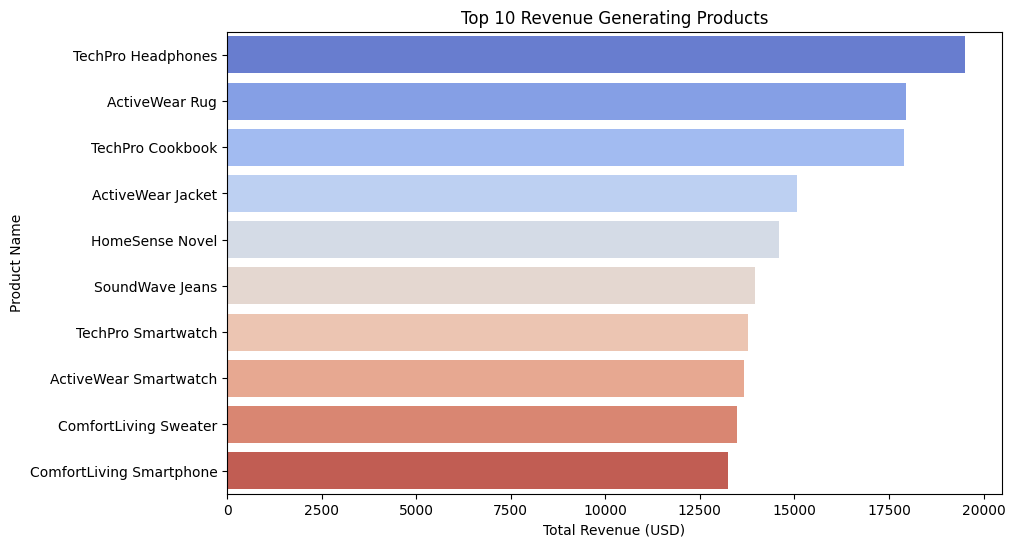

In [24]:
# Visualizing Top 10 Revenue Generating Products
plt.figure(figsize=(10, 6))
sns.barplot(data=top_revenue_products, x='TotalValue', y='ProductName', palette='coolwarm')
plt.title("Top 10 Revenue Generating Products")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Name")
plt.show()


From this, the top revenur generating product is TechPro Headphones. But as we observed earlier, the SoundWave company products were sold more. And TechPro Headphones is in the top 3 most sold products list. So we can safely assume that, SoundWave company products are sold more due to their low prices and TechPro Headphones are generating more revenue due to their medium to high prices. 

Even though TechPro Headphones are generating top revenue (assuming high prices), they are in top 3 position of most sold products. So, we can say that investing in TechPro brand or its headphones is a relatively safe option for good returns.

In short, TechPro Headphones are best performing so far.

In [25]:
cltv = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).reset_index()
cltv = cltv.merge(customers, on='CustomerID', how='left')
print(cltv.head(10))  # Top 10 customers by total spending


  CustomerID  TotalValue          CustomerName         Region  SignupDate
0      C0141    10673.87          Paul Parsons         Europe  2023-02-23
1      C0054     8040.39          Bruce Rhodes           Asia  2024-09-29
2      C0065     7663.70          Gerald Hines  North America  2024-07-10
3      C0156     7634.45         William Adams  North America  2023-08-19
4      C0082     7572.91          Aimee Taylor  South America  2022-05-13
5      C0188     7111.32             Anna Ball  South America  2022-05-17
6      C0059     7073.28  Mrs. Kimberly Wright  North America  2024-04-07
7      C0028     6819.57         Jennifer Pena           Asia  2024-06-29
8      C0099     6715.72          Rodney Eaton  South America  2023-01-29
9      C0165     6708.10         Juan Mcdaniel  South America  2022-04-09


C:\Users\PRAGNA\AppData\Local\Temp\ipykernel_10908\2762735058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cltv.head(10), x='TotalValue', y='CustomerName', palette='viridis')


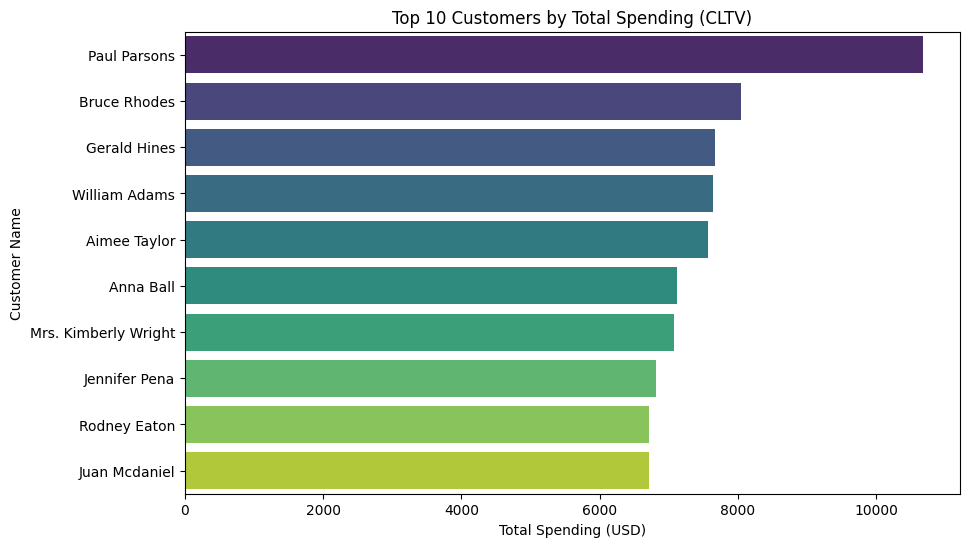

In [26]:
# Visualizing Top 10 Customers by Total Spending (CLTV)
plt.figure(figsize=(10, 6))
sns.barplot(data=cltv.head(10), x='TotalValue', y='CustomerName', palette='viridis')
plt.title("Top 10 Customers by Total Spending (CLTV)")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Customer Name")
plt.show()

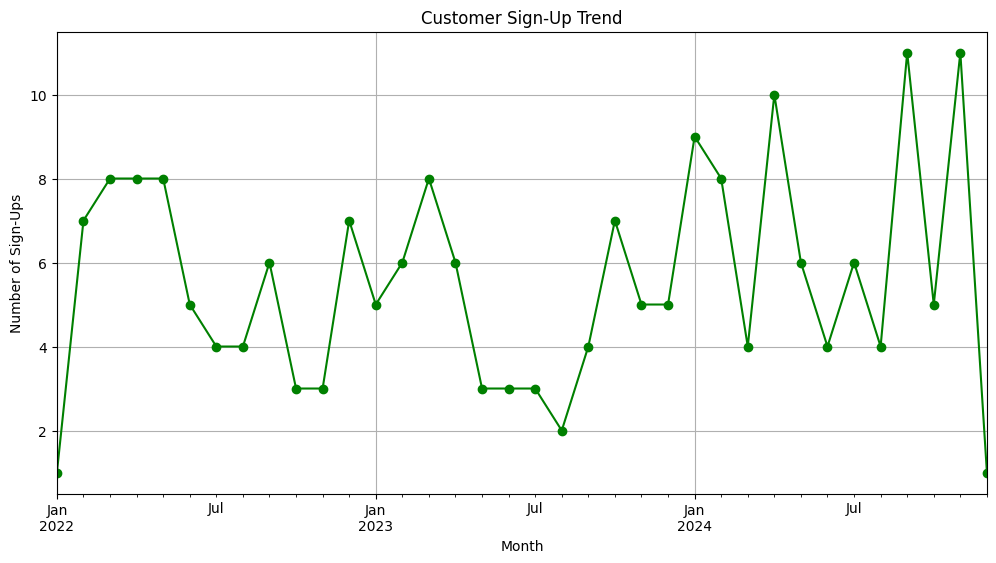

In [27]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trend = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
signup_trend.plot(kind='line', marker='o', color='g')
plt.title("Customer Sign-Up Trend")
plt.xlabel("Month")
plt.ylabel("Number of Sign-Ups")
plt.grid(True)
plt.show()


From this we can say that, most signups are observed in the months of September and November 2024. Most signups are observed in 2024 compared to 2023.

Category       Books  Clothing  Electronics  Home Decor
Region                                                 
Asia             120       166          132         142
Europe           165       119          144         167
North America    155       147          153         138
South America    241       158          198         192


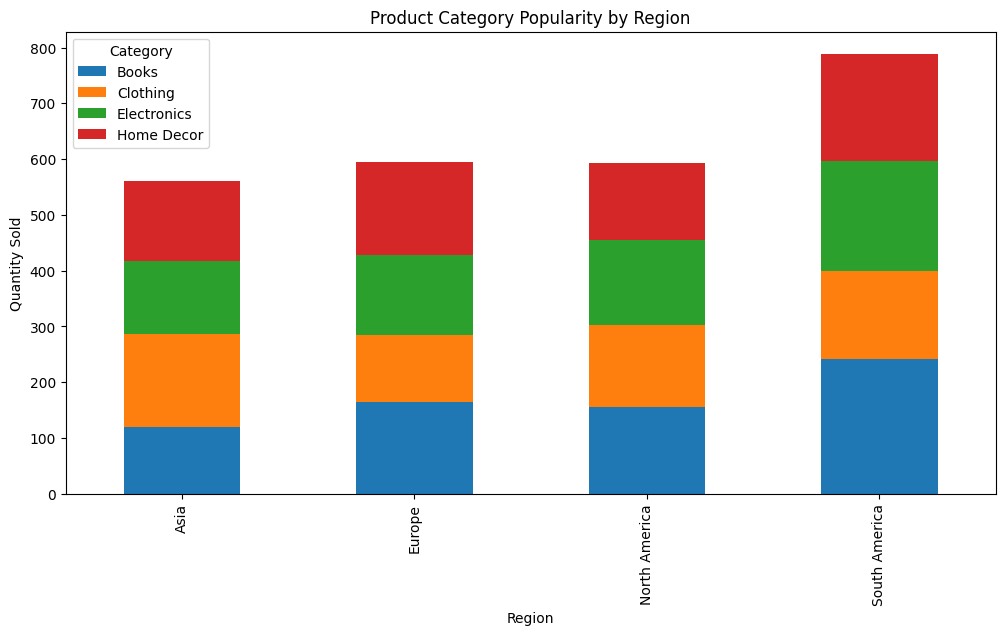

In [28]:
region_category_sales = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
category_by_region = region_category_sales.groupby(['Region', 'Category'])['Quantity'].sum().unstack()

print(category_by_region)
category_by_region.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Product Category Popularity by Region")
plt.xlabel("Region")
plt.ylabel("Quantity Sold")
plt.show()


Popular Category in Asia is Clothing,
In Europe is Home Decor, 
In North America is Books and 
In South America is Books.

From this we can understand the base of each category.

Category     Books  Clothing  Electronics  Home Decor
Month                                                
2023-12        NaN   1585.36      1870.24      313.92
2024-01   17515.05  17984.46     16786.31    14090.57
2024-02   21073.17   8091.81      8556.44    13737.85
2024-03    9091.55   7520.12     15383.29    15833.77
2024-04   11270.08  14454.24     18390.58    13404.16
2024-05   21793.32  17236.32     12244.79    13253.31
2024-06   16270.05  13217.41      9430.18     9853.54
2024-07   18501.32  16616.25     22096.51    14152.31
2024-08   18778.53  14436.85     18214.34    12007.02
2024-09   15454.39  18906.19     21703.48    14539.69
2024-10   13438.32  12093.82     12781.45     8749.63
2024-11   10556.56  11983.40     11275.89     4408.52
2024-12   18405.13  12044.43     12050.00    16549.64


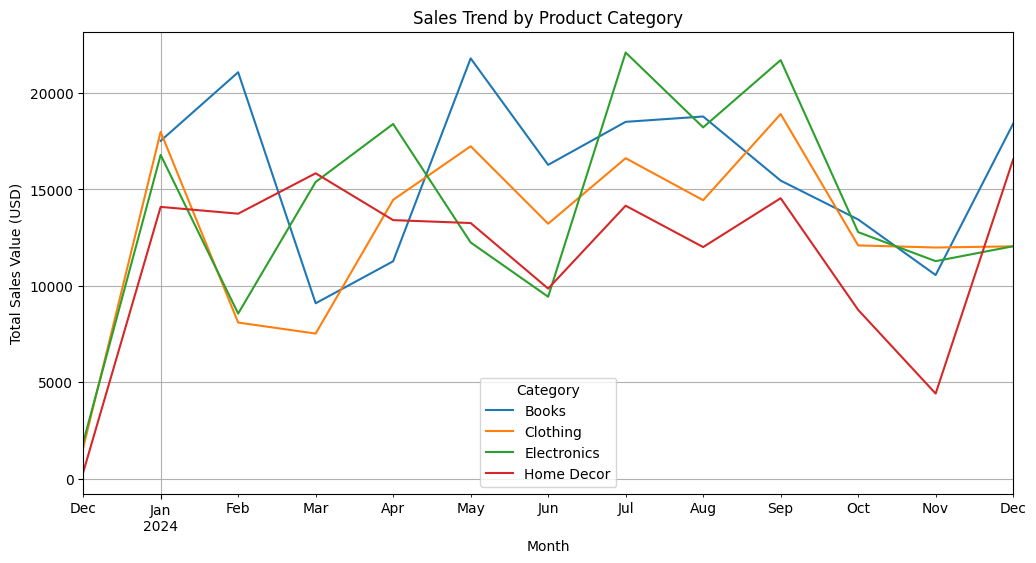

In [29]:
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
category_sales_trend = transactions.merge(products, on='ProductID').groupby(['Month', 'Category'])['TotalValue'].sum().unstack()

print(category_sales_trend)
category_sales_trend.plot(kind='line', figsize=(12, 6))
plt.title("Sales Trend by Product Category")
plt.xlabel("Month")
plt.ylabel("Total Sales Value (USD)")
plt.legend(title='Category')
plt.grid(True)
plt.show()

* Books category shows the highest spike in January 2024
* Clothing sales are consistently high
* Electronics category experiences fluctuations with major peaks in the middle of the year
* Books and Clothing categories show relatively consistent sales, while Electronics and Home Decor categories experience significant monthly fluctuations. Electronics may be influenced by new product launches or promotional events, and Home Decor is likely driven by seasonal trends (e.g., holiday season).
* Potential for promotional strategies based on seasonal patterns

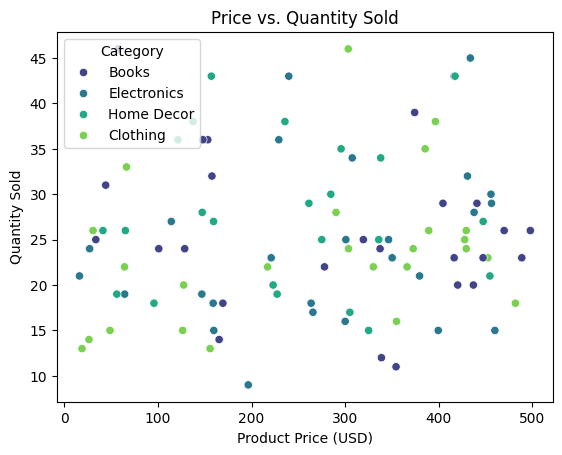

In [30]:
price_sales = products.merge(transactions.groupby('ProductID')['Quantity'].sum().reset_index(), on='ProductID')
sns.scatterplot(data=price_sales, x='Price', y='Quantity', hue='Category', palette='viridis')
plt.title("Price vs. Quantity Sold")
plt.xlabel("Product Price (USD)")
plt.ylabel("Quantity Sold")
plt.show()


Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


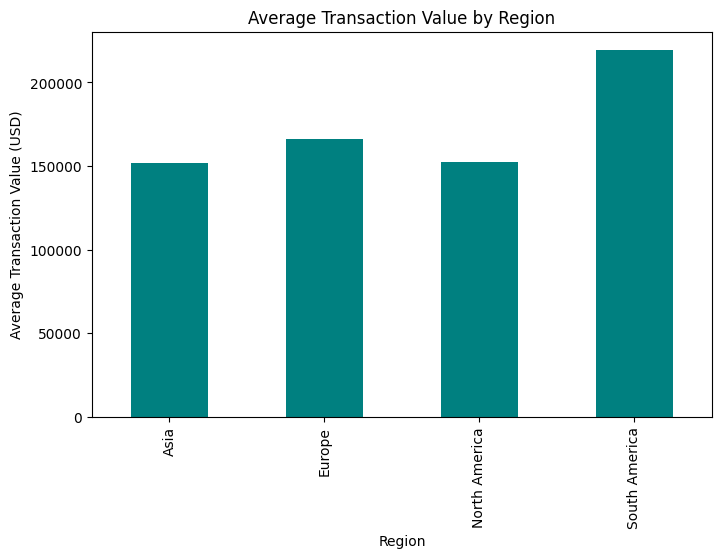

In [31]:
avg_transaction_value = region_revenue.groupby(region_revenue.index).mean()
print(avg_transaction_value)

avg_transaction_value.plot(kind='bar', color='teal', figsize=(8, 5))
plt.title("Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.show()

In [32]:
repeat_customers = transactions.groupby('CustomerID')['TransactionID'].nunique()
repeat_rate = (repeat_customers > 1).sum() / len(repeat_customers) * 100
print(f"Repeat Purchase Rate: {repeat_rate:.2f}%")

Repeat Purchase Rate: 93.97%


In [33]:
transactions_with_discounts = transactions.merge(products, on='ProductID', suffixes=('_sold', '_original'))
transactions_with_discounts['Discount'] = transactions_with_discounts['Price_original'] - transactions_with_discounts['Price_sold']
total_discounts = transactions_with_discounts['Discount'].sum()

most_discounted_products = transactions_with_discounts.groupby('ProductID')['Discount'].sum().sort_values(ascending=False).head(10)
print(most_discounted_products)

ProductID
P001    0.0
P002    0.0
P003    0.0
P004    0.0
P005    0.0
P006    0.0
P007    0.0
P008    0.0
P009    0.0
P010    0.0
Name: Discount, dtype: float64


In [34]:
print(transactions_with_discounts[['ProductID', 'Price_original', 'Price_sold', 'Discount']].head())

  ProductID  Price_original  Price_sold  Discount
0      P067          300.68      300.68       0.0
1      P067          300.68      300.68       0.0
2      P067          300.68      300.68       0.0
3      P067          300.68      300.68       0.0
4      P067          300.68      300.68       0.0


Average Order Value (AOV): $690.00


C:\Users\PRAGNA\AppData\Local\Temp\ipykernel_10908\3222873845.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_aov = transactions.groupby('Month').apply(lambda x: x['TotalValue'].sum() / x['TransactionID'].nunique()).reset_index()


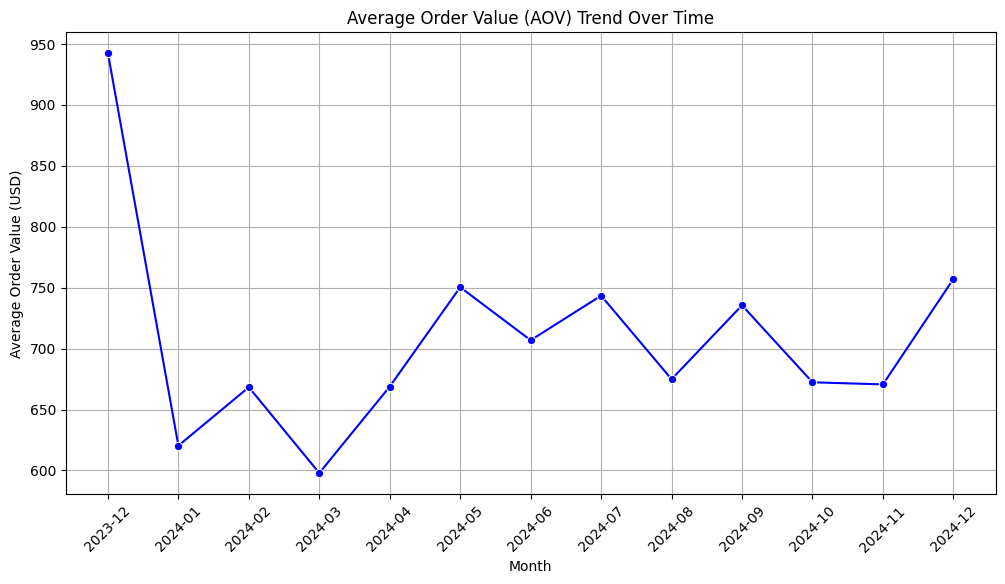

In [36]:
# Calculate Average Order Value (AOV)
# Group by TransactionID to get the total order value for each order
aov_data = transactions.groupby('TransactionID')['TotalValue'].sum().reset_index()

# Calculate the AOV by dividing the total revenue by the number of orders
aov = aov_data['TotalValue'].mean()
print(f"Average Order Value (AOV): ${aov:.2f}")

# Optional: Track AOV trend over time (e.g., by month)
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

# Group by Month and calculate the average order value (AOV) for each month
monthly_aov = transactions.groupby('Month').apply(lambda x: x['TotalValue'].sum() / x['TransactionID'].nunique()).reset_index()
monthly_aov.columns = ['Month', 'Monthly AOV']

# Convert Month to string format for proper plotting
monthly_aov['Month'] = monthly_aov['Month'].astype(str)

# Plotting the AOV trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_aov, x='Month', y='Monthly AOV', marker='o', color='b')
plt.title("Average Order Value (AOV) Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Average Order Value (USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
